<a href="https://colab.research.google.com/github/nhaandq/AI_project-VN10Food/blob/main/VNFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_folder = '/content/drive/MyDrive/VNFood/Training_data/'

In [4]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory=raw_folder,
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory=raw_folder,
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1398 images belonging to 10 classes.
Found 345 images belonging to 10 classes.


In [5]:
train_dataset.classes
train_dataset.class_indices

{'Banh_chung': 0,
 'Banh_mi': 1,
 'Bun_dau_mam_tom': 2,
 'Bun_thit_nuong': 3,
 'Ca_kho_to': 4,
 'Canh_chua': 5,
 'Chao_long': 6,
 'Com_tam': 7,
 'Goi_cuon': 8,
 'Pho': 9}

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3) ) )
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
140/140 [==============================] - 444s 3s/step - loss: 2.3273 - accuracy: 0.1710 - val_loss: 2.1594 - val_accuracy: 0.2058
Epoch 2/50
140/140 [==============================] - 34s 240ms/step - loss: 2.1571 - accuracy: 0.1974 - val_loss: 2.0841 - val_accuracy: 0.2261
Epoch 3/50
140/140 [==============================] - 33s 239ms/step - loss: 2.0929 - accuracy: 0.2253 - val_loss: 2.0612 - val_accuracy: 0.2319
Epoch 4/50
140/140 [==============================] - 33s 239ms/step - loss: 2.0151 - accuracy: 0.2682 - val_loss: 2.2669 - val_accuracy: 0.1913
Epoch 5/50
140/140 [==============================] - 34s 241ms/step - loss: 1.9830 - accuracy: 0.3026 - val_loss: 1.9203 - val_accuracy: 0.3159
Epoch 6/50
140/140 [==============================] - 34s 240ms/step - loss: 1.8714 - accuracy: 0.3383 - val_loss: 1.8823 - val_accuracy: 0.3072
Epoch 7/50
140/140 [==============================] - 33s 239ms/step - loss: 1.7132 - accuracy: 0.4156 - val_loss: 2.0141 - val_accu

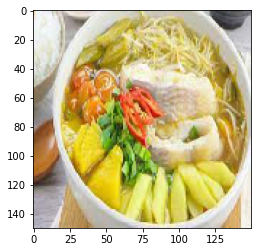

[[2.7544915e-09 3.9001593e-06 5.1137550e-07 7.4254401e-11 5.8581910e-13
  9.9972957e-01 3.1942686e-06 1.0744876e-05 2.9547589e-10 2.5205157e-04]]
Canh chua


In [20]:
classes = ['Bánh chưng','Bánh mì','Bún đậu mắm tôm','Bún thịt nướng','Cá kho tộ',
           'Canh chua','Cháo lòng','Cơm tấm','Gỏi cuốn','Phở']

filename = "/content/drive/MyDrive/VNFood/Test/canhchua.jpg"
img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print(model.predict(img))
print(classes[np.argmax(model.predict(img))])

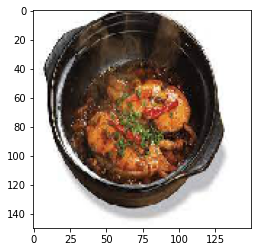

[[6.4255312e-09 6.8091241e-11 1.1374730e-13 1.0751990e-06 9.9999142e-01
  1.6976390e-08 3.7632058e-14 4.4220844e-08 3.6605143e-13 7.4833879e-06]]
Cá kho tộ


In [21]:
filename = "/content/drive/MyDrive/VNFood/Test/cakhoto.jpg"
img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print(model.predict(img))
print(classes[np.argmax(model.predict(img))])